In [1]:
library(corrplot)
# Scale data again: log(right skew), standard, min-max
mydata = read.csv('binary.csv')

# View the first few rows of the data
print(head(mydata))
print(tail(mydata))
print(summary(mydata))

corrplot 0.84 loaded



  admit gre  gpa rank
1     0 380 3.61    3
2     1 660 3.67    3
3     1 800 4.00    1
4     1 640 3.19    4
5     0 520 2.93    4
6     1 760 3.00    2
    admit gre  gpa rank
395     1 460 3.99    3
396     0 620 4.00    2
397     0 560 3.04    3
398     0 460 2.63    2
399     0 700 3.65    2
400     0 600 3.89    3
     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  


In [3]:
install.packages('Amelia')

Installing package into 'C:/Users/hv/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hv\AppData\Local\Temp\Rtmpoj4aRB\downloaded_packages


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



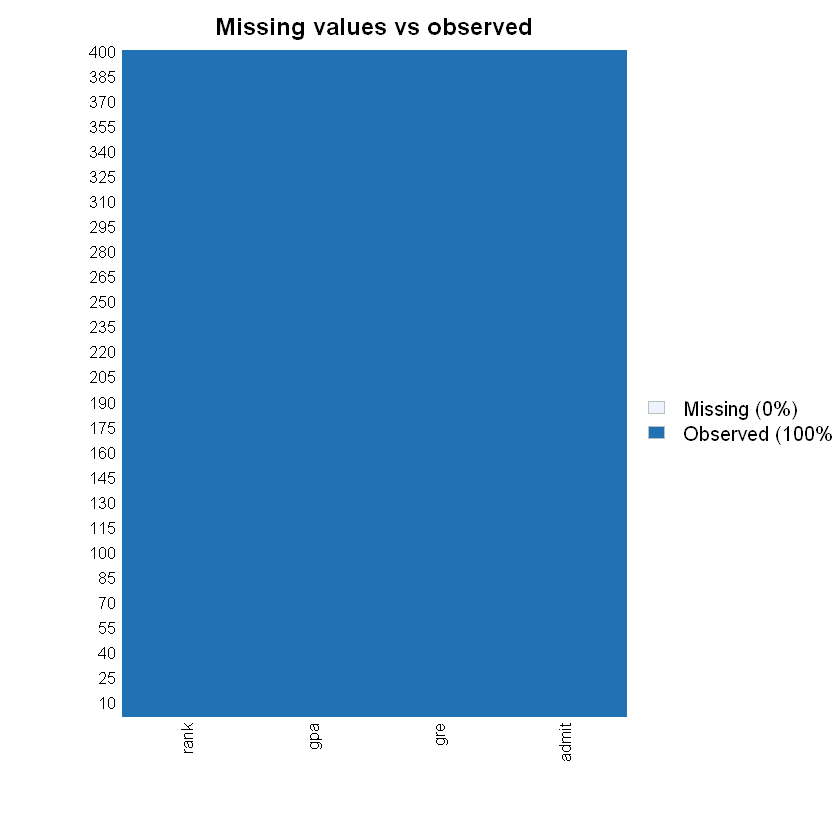

In [4]:
# Check missing value
library(Amelia)
missmap(mydata, main='Missing values vs observed')

In [6]:
# Count elements in each Class
print(table(mydata$admit))


  0   1 
273 127 


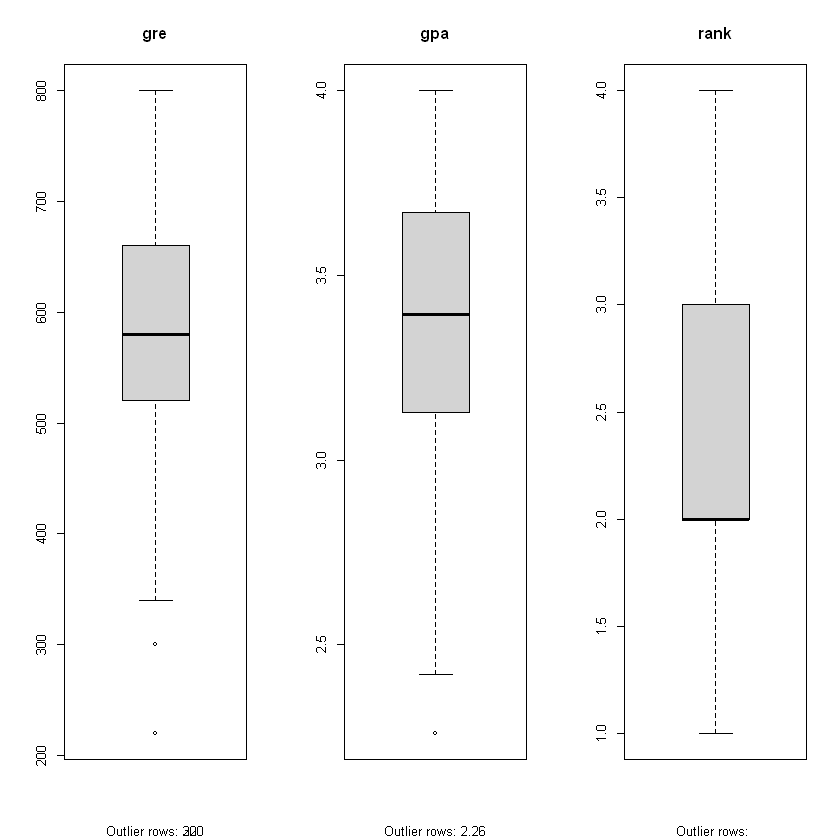

In [7]:
# Boxplot to check for outliers
par(mfrow=c(1,3)) # divide graph area in 3 columns
boxplot(mydata$gre, main='gre',
       sub=paste('Outlier rows:', boxplot.stats(mydata$gre)$out)) # box plot for 'gre'
boxplot(mydata$gpa, main='gpa',
       sub=paste('Outlier rows:', boxplot.stats(mydata$gpa)$out)) # box plot for 'gpa'
boxplot(mydata$rank, main='rank',
       sub=paste('Outlier rows:', boxplot.stats(mydata$rank)$out)) # box plot for 'rank'

In [9]:
gre_outliers = boxplot.stats(mydata$gre)$out
print('gre_outliers:')
print(gre_outliers)
print(paste('Numrows:', sum(mydata$gre==gre_outliers[1]+sum(mydata$gre==gre_outliers[3]))))

gpa_outliers = boxplot.stats(mydata$gpa)$out
print('gpa_outliers:')
print(gpa_outliers)
print(paste('Numrows:', sum(mydata$gpa==gre_outliers[1])))

# drop rows have outliers
print(paste('Before drop:', nrow(mydata)))
mydata = mydata[mydata$gre != gre_outliers[1],]
mydata = mydata[mydata$gre != gre_outliers[3],]
mydata = mydata[mydata$gpa != gpa_outliers[1],]
print(paste('After drop:', nrow(mydata)))

[1] "gre_outliers:"
[1] 300 300 220 300
[1] "Numrows: 0"
[1] "gpa_outliers:"
[1] 2.26
[1] "Numrows: 0"
[1] "Before drop: 400"
[1] "After drop: 395"


            gre         gpa        rank
gre   1.0000000  0.35937135 -0.10785090
gpa   0.3593714  1.00000000 -0.03994452
rank -0.1078509 -0.03994452  1.00000000


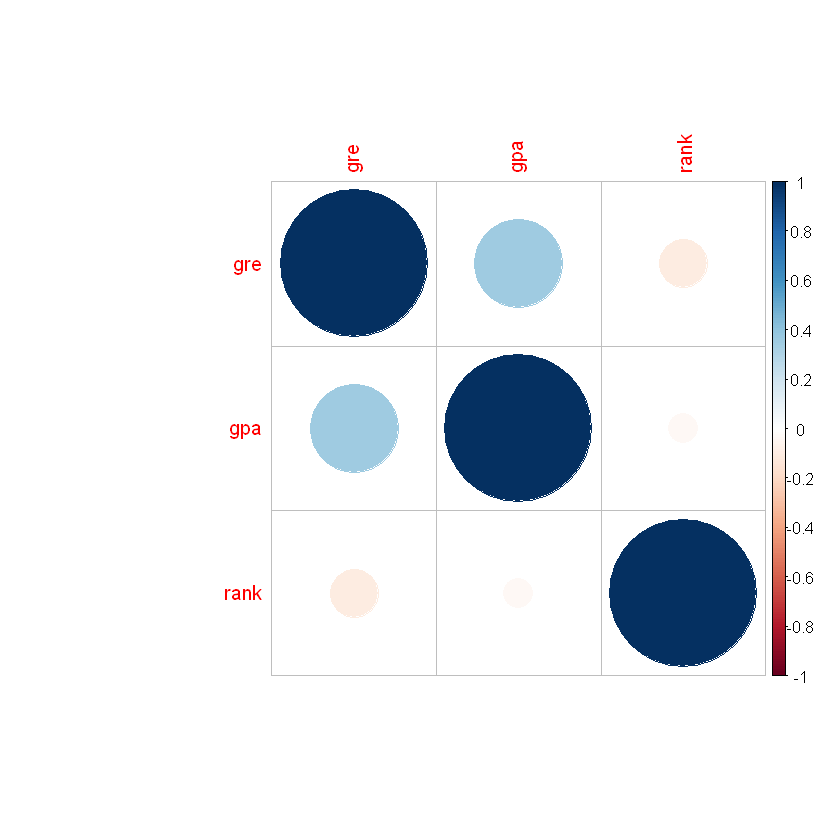

In [10]:
# calculating the correlation between each pair of numeric variables
correlations = cor(mydata[,2:4])
print(correlations)
corrplot(correlations, method='circle')

In [11]:
# Create Train - Test set: 70 - 30
n = nrow(mydata)
trainIndex = sample(1:n, size=round(0.7*n), replace=FALSE)
train = mydata[trainIndex , ]
test = mydata[-trainIndex , ]
print('Rows of training data and test data:')
print(nrow(train))
print(nrow(test))

[1] "Rows of training data and test data:"
[1] 276
[1] 119


In [15]:
# estimates a logistic regression model using the glm (generalized linear model) function
mylogit = glm(admit~ gre + gpa + rank, data=train, family='binomial')
print(summary(mylogit))


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5908  -0.8623  -0.5895   1.0770   2.2523  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.348055   1.402785  -1.674   0.0942 .  
gre          0.001344   0.001365   0.985   0.3248    
gpa          0.745846   0.397131   1.878   0.0604 .  
rank        -0.754690   0.158950  -4.748 2.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 345.55  on 275  degrees of freedom
Residual deviance: 309.46  on 272  degrees of freedom
AIC: 317.46

Number of Fisher Scoring iterations: 4



In [16]:
pred = predict(mylogit, newdata = test, 
              type= 'response')
pred_value = ifelse(pred > 0.5,1,0)
print('Testdata admit vs predict (10 rows:)')
result = data.frame(testAdmit = test$admit[30:40], pred_value[30:40])
print(result)

[1] "Testdata admit vs predict (10 rows:)"
    testAdmit pred_value.30.40.
78          1                 0
81          0                 0
87          0                 0
89          0                 1
98          0                 0
99          0                 0
105         1                 0
106         1                 0
110         0                 0
120         0                 0
123         0                 0


In [18]:
install.packages('caret')

Installing package into 'C:/Users/hv/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'SQUAREM', 'lava', 'prodlim', 'iterators', 'gower', 'ipred', 'foreach', 'ModelMetrics', 'recipes', 'pROC'




package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hv\AppData\Local\Temp\Rtmpoj4aRB\downloaded_packages


In [19]:
library('caret')

Loading required package: lattice

Loading required package: ggplot2



In [22]:
pred_value = factor(pred_value)
test$admit = factor(test$admit)

In [23]:
confusionMatrix(pred_value, test$admit)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 74 32
         1  7  6
                                          
               Accuracy : 0.6723          
                 95% CI : (0.5802, 0.7555)
    No Information Rate : 0.6807          
    P-Value [Acc > NIR] : 0.6200370       
                                          
                  Kappa : 0.0866          
                                          
 Mcnemar's Test P-Value : 0.0001215       
                                          
            Sensitivity : 0.9136          
            Specificity : 0.1579          
         Pos Pred Value : 0.6981          
         Neg Pred Value : 0.4615          
             Prevalence : 0.6807          
         Detection Rate : 0.6218          
   Detection Prevalence : 0.8908          
      Balanced Accuracy : 0.5357          
                                          
       'Positive' Class : 0               
                                    

In [24]:
# Solution 1
accuracy = table(pred_value, test[,'admit'])
accuracy = sum(diag(accuracy))/sum(accuracy)
print(paste('Accuracy s1:', accuracy))
# Solution 2
misClassifierror = mean(pred_value != test$admit)
print(paste('Accuracy s2:', 1- misClassifierror))

[1] "Accuracy s1: 0.672268907563025"
[1] "Accuracy s2: 0.672268907563025"


In [25]:
# make new prediction
y1 = predict(mylogit,
            newdata=data.frame(gre=c(580, 800),
                               gpa=c(3.4,4),
                               rank=c(3,1)),
            type='response')
y1 = ifelse(y1>0.5,1,0)
print('results:')
print(y1)

[1] "results:"
1 2 
0 1 
